# Target Store Sales Prediction

### Content:

You are provided with historical sales data for 45 stores located in different region search store contains a number of departments. The company also runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks.

### Objective:

One challenge of modeling retail data is the need to make decisions based on limited history. Holidays and select major events come once a year, and so does the chance to see how strategic decisions impacted the bottom line. In addition, markdowns are known to affect sales the challenge is to predict which departments will be affected and to what extent.

### Basic Description of Data
Over here we have 3 Excel Sheet, named as Store_Details, Business_Data and Sales_History.

Store_Details: Anonymized information about 45 stores indicating store type, Address, Location and size of store.

Business_Data:
Contains additional data related to the store, department, and regional activity for the given dates.

Sales_History:
Historical sales data of each store from 30th April 2017 to 25th October 2019.

### Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn import preprocessing
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn import metrics

In [2]:
os.chdir(r'G:\Ivy Pro Data Science, AI and Machine L\PYTHON\Target Store Sales Case Study')
os.getcwd()

'G:\\Ivy Pro Data Science, AI and Machine L\\PYTHON\\Target Store Sales Case Study'

### Import data

##### Let look first Business_data csv file

In [3]:
df_Business_Data = pd.read_csv('Business_Data.csv')

In [4]:
df_Business_Data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate,Holiday
0,1,4/30/2017,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,11/30/2017,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2/17/2017,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2/24/2017,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,5/1/2017,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
df_Business_Data.shape

(8190, 12)

In [6]:
df_Business_Data.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment_Rate',
       'Holiday'],
      dtype='object')

### Basic EDA

In [7]:
# Now we will check the descriptive statistics of Business Data
df_Business_Data.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


Over here we can see that Markdown1, Markdown2, Markdown3, Markdown4 and Markdown5 have some negative values, we will remove these values from all markdown columns.

In [8]:
# Lets see negative values for Markdown1 column
df_Business_Data[df_Business_Data['MarkDown1']<0]

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate,Holiday
4162,23,2/14/2020,25.39,3.807,-563.90,2825.54,21.0,5510.21,4677.39,138.900429,3.932,False
5437,30,2/21/2020,49.09,3.597,-2781.45,297.30,NaN,NaN,791.67,224.054703,6.237,False
6514,36,9/10/2019,68.58,3.313,-16.93,850.05,NaN,NaN,733.24,222.150626,6.228,False
6518,36,7/11/2019,68.04,3.204,-772.21,NaN,NaN,NaN,692.10,222.325549,6.228,False


In [9]:
# Lets see negative values for Markdown2 column
df_Business_Data[df_Business_Data['MarkDown2']<0]

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate,Holiday
657,4,3/22/2019,59.07,3.759,8806.80,-10.50,5.99,739.14,4396.97,130.896645,4.607,False
860,5,8/16/2019,87.52,3.571,1649.56,-10.98,2.31,1955.75,1205.23,222.627675,5.603,False
873,5,11/15/2019,56.89,3.252,1631.01,-35.74,15.46,326.59,2310.83,224.106624,5.422,False
1265,7,5/29/2020,50.70,3.870,2350.78,-7.76,91.59,166.86,540.89,NaN,NaN,False
1587,9,10/7/2019,88.66,3.494,3180.78,-9.94,1.40,2112.03,2314.58,225.717009,5.277,False
1591,9,7/8/2019,87.93,3.730,4837.99,-5.96,22.74,602.80,1377.59,226.210354,5.277,True
1748,10,3/15/2019,62.11,4.273,3977.45,-10.50,6.03,1928.50,2273.92,130.826194,7.545,False
1766,10,7/19/2019,84.45,3.589,6596.80,-1.60,44.60,4275.27,10650.28,130.701290,7.170,False
1987,11,4/17/2020,70.87,3.451,3808.66,-15.45,142.70,529.99,2742.75,228.729864,5.999,False
2128,12,6/6/2019,89.13,3.765,10804.73,-0.60,3.33,5397.84,4395.03,130.719633,10.926,False


In [10]:
# Lets see negative values for Markdown3 column
df_Business_Data[df_Business_Data['MarkDown3']<0]

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate,Holiday
1063,6,10/30/2020,48.26,3.243,5510.29,33063.57,-0.86,693.10,3418.77,225.832011,5.372,False
1611,9,1/24/2020,49.14,3.227,200.46,348.20,-14.29,59.00,2162.77,228.030618,5.049,False
1615,9,2/21/2020,45.91,3.597,2810.86,1405.04,-179.26,63.12,3593.56,228.205445,5.049,False
2337,13,10/30/2020,20.00,2.982,3726.82,17212.29,-23.97,116.72,2662.80,131.957000,5.372,False
3978,22,1/1/2020,32.63,3.608,19102.16,1403.25,-89.10,43742.76,1549.09,142.868066,7.328,False
3981,22,2/21/2020,30.28,3.866,10313.25,4247.11,-2.58,2512.93,3651.16,142.970823,7.328,False
5036,28,8/5/2019,84.83,4.103,9026.85,101.20,-29.10,833.67,11752.37,130.889677,11.627,False
5572,31,3/29/2019,67.87,3.845,9546.49,584.62,-1.00,1334.23,3691.10,220.999125,7.057,False
6354,35,12/2/2020,53.28,3.724,4828.15,4850.29,-44.54,878.64,1098.99,143.220074,8.360,False
6466,36,9/10/2018,50.64,3.147,NaN,NaN,-0.87,NaN,1129.02,217.664588,7.716,False


In [11]:
# Lets see negative values for Markdown4 column
df_Business_Data[df_Business_Data['MarkDown4']<0]

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate,Holiday


In [12]:
# Lets see negative values for Markdown5 column
df_Business_Data[df_Business_Data['MarkDown5']<0]

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate,Holiday
893,5,5/2/2020,61.88,3.583,9023.29,927.32,170.24,405.30,-185.17,225.682320,5.278,False
5785,32,2/9/2019,46.32,3.604,11156.55,5943.82,24.22,441.71,-37.02,199.290867,7.557,False


In [13]:
# Now we will drop the negative values for each markdown columns

df_Business_Data.drop(df_Business_Data.index[df_Business_Data['MarkDown1'] <0], inplace = True)
df_Business_Data.drop(df_Business_Data.index[df_Business_Data['MarkDown2'] <0], inplace = True)
df_Business_Data.drop(df_Business_Data.index[df_Business_Data['MarkDown3'] <0], inplace = True)
df_Business_Data.drop(df_Business_Data.index[df_Business_Data['MarkDown5'] <0], inplace = True)

In [14]:
# now again looking at the descriptive statistics of Business Data
df_Business_Data.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate
count,8146.000000,8146.000000,8146.000000,3989.000000,2880.000000,3574.000000,3424.000000,4006.000000,7562.000000,7562.000000
mean,23.009821,59.357256,3.404681,7046.291479,3401.659896,1736.025353,3300.577228,4140.518228,172.409314,7.831433
std,12.992963,18.682743,0.431625,9298.056796,8825.697407,11063.686182,6792.265812,13151.778508,39.721673,1.877390
min,1.000000,-7.290000,2.472000,0.270000,0.000000,0.000000,0.220000,40.980000,126.064000,3.684000
25%,12.000000,45.880000,3.038250,1573.240000,70.985000,6.692500,303.520000,1443.060000,132.364839,6.635000
50%,23.000000,60.725000,3.510000,4737.510000,375.200000,36.980000,1180.700000,2737.250000,182.693256,7.806000
75%,34.000000,73.880000,3.742000,8920.010000,2188.917500,163.990000,3310.792500,4836.962500,213.871114,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,146394.440000,67474.850000,771448.100000,228.976456,14.313000


Store                   0
Date                    0
Temperature             0
Fuel_Price              0
MarkDown1            4157
MarkDown2            5266
MarkDown3            4572
MarkDown4            4722
MarkDown5            4140
CPI                   584
Unemployment_Rate     584
Holiday                 0
dtype: int64


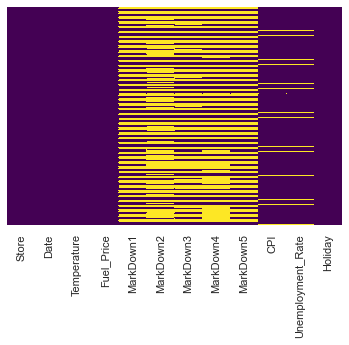

In [15]:
# to check the missing values 
print(df_Business_Data.isnull().sum())

# to see missing value using visualisation
sns.heatmap(df_Business_Data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
percent = (df_Business_Data.isnull().sum()/df_Business_Data.isnull().count())
percent
# 0.5% data missing

Store                0.000000
Date                 0.000000
Temperature          0.000000
Fuel_Price           0.000000
MarkDown1            0.510312
MarkDown2            0.646452
MarkDown3            0.561257
MarkDown4            0.579671
MarkDown5            0.508225
CPI                  0.071692
Unemployment_Rate    0.071692
Holiday              0.000000
dtype: float64

In [17]:
# Treating missing values in CPI
df_Business_Data['CPI'].fillna(df_Business_Data['CPI'].mean(),inplace=True)

# Treating missing values in Unemployment_Rate
df_Business_Data['Unemployment_Rate'].fillna(df_Business_Data['Unemployment_Rate'].mean(),inplace=True)

In [18]:
# Filling NaN with zero, since Markdown columns are explaining the marketing campaign details, 
# also, the percentage null values are above 50%, so we will impute the null values with 0

df_Business_Data['MarkDown1'] = df_Business_Data['MarkDown1'].fillna(0)
df_Business_Data['MarkDown2'] = df_Business_Data['MarkDown2'].fillna(0)
df_Business_Data['MarkDown3'] = df_Business_Data['MarkDown3'].fillna(0)
df_Business_Data['MarkDown4'] = df_Business_Data['MarkDown4'].fillna(0)
df_Business_Data['MarkDown5'] = df_Business_Data['MarkDown5'].fillna(0)

In [19]:
# Now again checking the missing values in Business data 
df_Business_Data.isnull().sum()

Store                0
Date                 0
Temperature          0
Fuel_Price           0
MarkDown1            0
MarkDown2            0
MarkDown3            0
MarkDown4            0
MarkDown5            0
CPI                  0
Unemployment_Rate    0
Holiday              0
dtype: int64

### Outlier Check for business data

* For Outliers if it is Gaussian Distribution, then we will go be standard deviation
* If it is not a Gaussian Distribution, we will go by IQR approach

{'whiskers': [<matplotlib.lines.Line2D at 0x19a61249f40>,
 'caps': [<matplotlib.lines.Line2D at 0x19a612745b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19a61249c10>],
 'medians': [<matplotlib.lines.Line2D at 0x19a61274c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x19a61274f70>],
 'means': []}

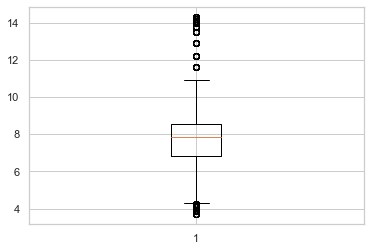

In [20]:
plt.boxplot(df_Business_Data['Unemployment_Rate'])

{'whiskers': [<matplotlib.lines.Line2D at 0x19a612d1be0>,
 'caps': [<matplotlib.lines.Line2D at 0x19a612de2e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19a612d1880>],
 'medians': [<matplotlib.lines.Line2D at 0x19a612de9a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19a612deca0>],
 'means': []}

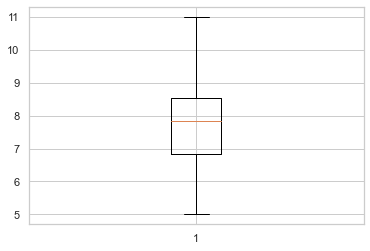

In [21]:
df_Business_Data['Unemployment_Rate']= np.where(df_Business_Data['Unemployment_Rate']>11,11,df_Business_Data['Unemployment_Rate'])
df_Business_Data['Unemployment_Rate']= np.where(df_Business_Data['Unemployment_Rate']<5,5,df_Business_Data['Unemployment_Rate'])
plt.boxplot(df_Business_Data['Unemployment_Rate'])
# outlier removed

{'whiskers': [<matplotlib.lines.Line2D at 0x19a612ec700>,
 'caps': [<matplotlib.lines.Line2D at 0x19a612fe640>,
 'boxes': [<matplotlib.lines.Line2D at 0x19a612ec8b0>],
 'medians': [<matplotlib.lines.Line2D at 0x19a612f9790>],
 'fliers': [<matplotlib.lines.Line2D at 0x19a612f94c0>],
 'means': []}

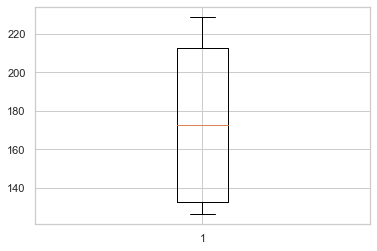

In [22]:
plt.boxplot(df_Business_Data['CPI'])
# No outlier found

{'whiskers': [<matplotlib.lines.Line2D at 0x19a61379580>,
 'caps': [<matplotlib.lines.Line2D at 0x19a61379c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x19a61379220>],
 'medians': [<matplotlib.lines.Line2D at 0x19a61385340>],
 'fliers': [<matplotlib.lines.Line2D at 0x19a61385640>],
 'means': []}

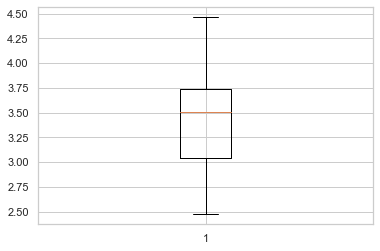

In [23]:
plt.boxplot(df_Business_Data['Fuel_Price'])
# No outlier found

{'whiskers': [<matplotlib.lines.Line2D at 0x19a613d6820>,
 'caps': [<matplotlib.lines.Line2D at 0x19a613d6ee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19a613d64c0>],
 'medians': [<matplotlib.lines.Line2D at 0x19a613e35e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19a613e38e0>],
 'means': []}

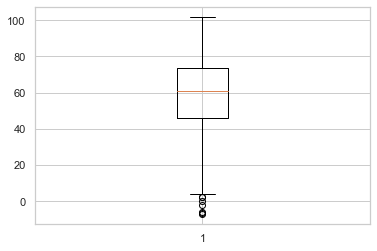

In [24]:
plt.boxplot(df_Business_Data['Temperature'])

{'whiskers': [<matplotlib.lines.Line2D at 0x19a6142ad90>,
 'caps': [<matplotlib.lines.Line2D at 0x19a61439490>,
 'boxes': [<matplotlib.lines.Line2D at 0x19a6142aa30>],
 'medians': [<matplotlib.lines.Line2D at 0x19a61439b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x19a61439e50>],
 'means': []}

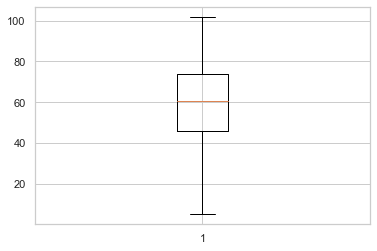

In [25]:
df_Business_Data['Temperature']= np.where(df_Business_Data['Temperature']<5,5,df_Business_Data['Temperature'])
plt.boxplot(df_Business_Data['Temperature'])
# outlier removed

{'whiskers': [<matplotlib.lines.Line2D at 0x19a61488640>,
 'caps': [<matplotlib.lines.Line2D at 0x19a61488d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x19a614882e0>],
 'medians': [<matplotlib.lines.Line2D at 0x19a61491400>],
 'fliers': [<matplotlib.lines.Line2D at 0x19a61491700>],
 'means': []}

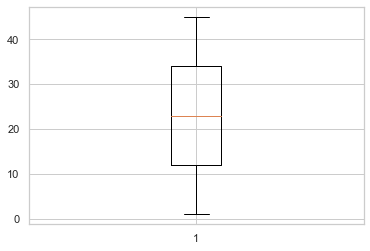

In [26]:
plt.boxplot(df_Business_Data['Store'])
# No outlier found

{'whiskers': [<matplotlib.lines.Line2D at 0x19a614df340>,
 'caps': [<matplotlib.lines.Line2D at 0x19a614dfa00>,
 'boxes': [<matplotlib.lines.Line2D at 0x19a614df040>],
 'medians': [<matplotlib.lines.Line2D at 0x19a614eb100>],
 'fliers': [<matplotlib.lines.Line2D at 0x19a614eb400>],
 'means': []}

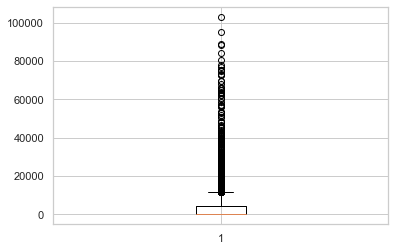

In [27]:
plt.boxplot(df_Business_Data['MarkDown1'])

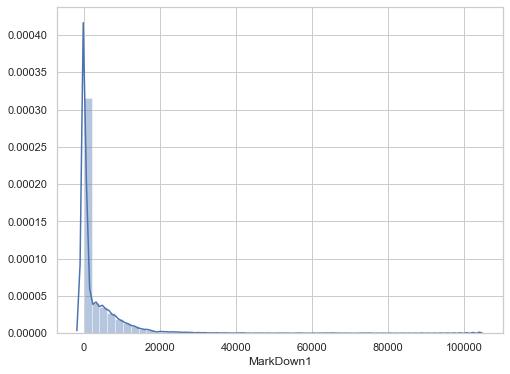

In [28]:
plt.figure(figsize=(8,6))
sns.distplot(df_Business_Data['MarkDown1'])

In [29]:
IQR = df_Business_Data['MarkDown1'].quantile(0.75) - df_Business_Data['MarkDown1'].quantile(0.25)
print('IQR:',IQR)

IQR: 4616.735000000001


In [30]:
Upper_bound = df_Business_Data['MarkDown1'].quantile(0.75) + (1.5 * IQR)
lower_bound = df_Business_Data['MarkDown1'].quantile(0.25) - (1.5 * IQR)
print(Upper_bound)
print(lower_bound)

11541.837500000001
-6925.102500000001


{'whiskers': [<matplotlib.lines.Line2D at 0x19a625f1d60>,
 'caps': [<matplotlib.lines.Line2D at 0x19a62600460>,
 'boxes': [<matplotlib.lines.Line2D at 0x19a625f1a00>],
 'medians': [<matplotlib.lines.Line2D at 0x19a62600b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x19a62600e20>],
 'means': []}

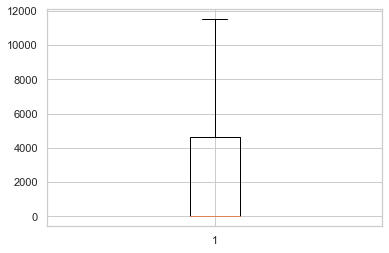

In [31]:
df_Business_Data.loc[df_Business_Data["MarkDown1"] > 11541.8, "MarkDown1"] = 11541.8
plt.boxplot(df_Business_Data['MarkDown1'])
#outlier removed

{'whiskers': [<matplotlib.lines.Line2D at 0x19a62654490>,
 'caps': [<matplotlib.lines.Line2D at 0x19a62654b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x19a62654130>],
 'medians': [<matplotlib.lines.Line2D at 0x19a6265d250>],
 'fliers': [<matplotlib.lines.Line2D at 0x19a6265d550>],
 'means': []}

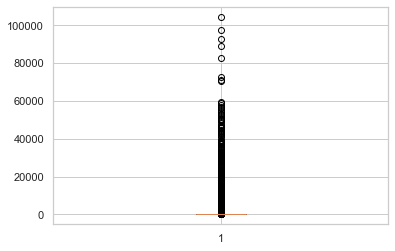

In [32]:
plt.boxplot(df_Business_Data['MarkDown2'])

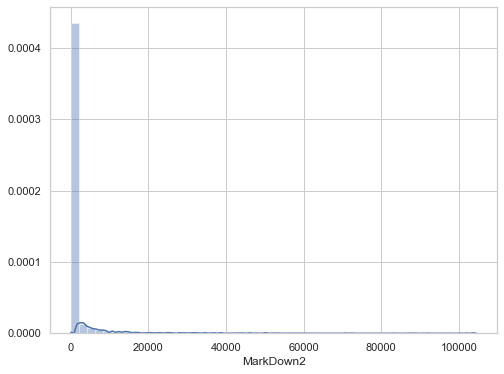

In [33]:
plt.figure(figsize=(8,6))
sns.distplot(df_Business_Data['MarkDown2'])

In [34]:
IQR = df_Business_Data['MarkDown2'].quantile(0.75) - df_Business_Data['MarkDown2'].quantile(0.25)
print('IQR:',IQR)

IQR: 97.7225


In [35]:
Upper_bound = df_Business_Data['MarkDown2'].quantile(0.75) + (1.5 * IQR)
lower_bound = df_Business_Data['MarkDown2'].quantile(0.25) - (1.5 * IQR)
print(Upper_bound)
print(lower_bound)

244.30625
-146.58375


{'whiskers': [<matplotlib.lines.Line2D at 0x19a62777f70>,
 'caps': [<matplotlib.lines.Line2D at 0x19a62785670>,
 'boxes': [<matplotlib.lines.Line2D at 0x19a62777c10>],
 'medians': [<matplotlib.lines.Line2D at 0x19a62785d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x19a62791070>],
 'means': []}

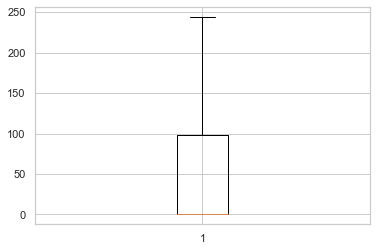

In [36]:
df_Business_Data.loc[df_Business_Data["MarkDown2"] > 244.3, "MarkDown2"] = 244.3
df_Business_Data.loc[df_Business_Data["MarkDown2"] < -146.5, "MarkDown2"] = -146.5
plt.boxplot(df_Business_Data['MarkDown2'])
#outlier removed

{'whiskers': [<matplotlib.lines.Line2D at 0x19a627d4af0>,
 'caps': [<matplotlib.lines.Line2D at 0x19a627e11f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19a627d4790>],
 'medians': [<matplotlib.lines.Line2D at 0x19a627e18b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19a627e1bb0>],
 'means': []}

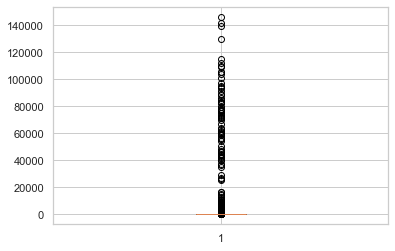

In [37]:
plt.boxplot(df_Business_Data['MarkDown3'])

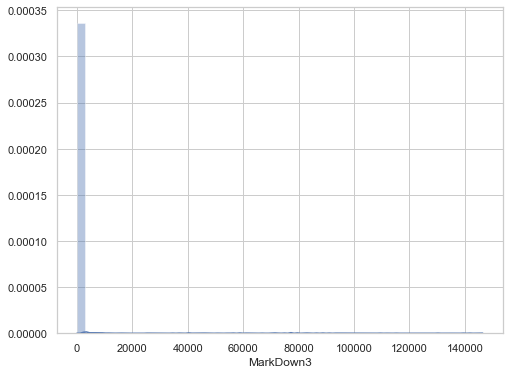

In [38]:
plt.figure(figsize=(8,6))
sns.distplot(df_Business_Data['MarkDown3'])

In [39]:
IQR = df_Business_Data['MarkDown3'].quantile(0.75) - df_Business_Data['MarkDown3'].quantile(0.25)
print('IQR:',IQR)

IQR: 24.105


In [40]:
Upper_bound = df_Business_Data['MarkDown3'].quantile(0.75) + (1.5 * IQR)
lower_bound = df_Business_Data['MarkDown3'].quantile(0.25) - (1.5 * IQR)

print(Upper_bound)
print(lower_bound)

60.2625
-36.1575


{'whiskers': [<matplotlib.lines.Line2D at 0x19a628fe160>,
 'caps': [<matplotlib.lines.Line2D at 0x19a628fe820>,
 'boxes': [<matplotlib.lines.Line2D at 0x19a628efdc0>],
 'medians': [<matplotlib.lines.Line2D at 0x19a628feee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19a62907220>],
 'means': []}

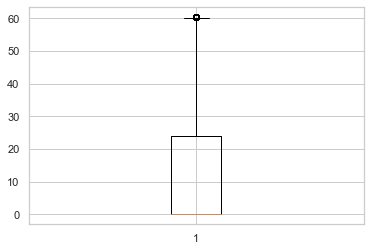

In [41]:
df_Business_Data.loc[df_Business_Data["MarkDown3"] > 60.5, "MarkDown3"] = 60.5
df_Business_Data.loc[df_Business_Data["MarkDown3"] < -36.3, "MarkDown3"] = -36.3
plt.boxplot(df_Business_Data['MarkDown3'])
#outlier removed

{'whiskers': [<matplotlib.lines.Line2D at 0x19a6292e550>,
 'caps': [<matplotlib.lines.Line2D at 0x19a6292ec10>,
 'boxes': [<matplotlib.lines.Line2D at 0x19a6292e1f0>],
 'medians': [<matplotlib.lines.Line2D at 0x19a6295a310>],
 'fliers': [<matplotlib.lines.Line2D at 0x19a6295a610>],
 'means': []}

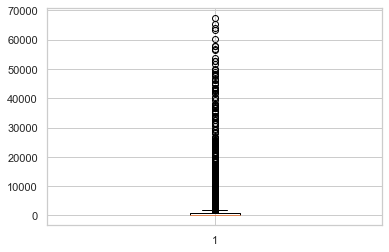

In [42]:
plt.boxplot(df_Business_Data['MarkDown4'])

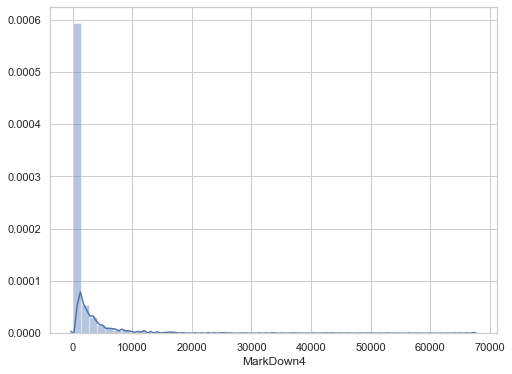

In [43]:
plt.figure(figsize=(8,6))
sns.distplot(df_Business_Data['MarkDown4'])

In [44]:
IQR = df_Business_Data['MarkDown4'].quantile(0.75) - df_Business_Data['MarkDown4'].quantile(0.25)
print('IQR:',IQR)

IQR: 763.8050000000001


In [45]:
Upper_bound = df_Business_Data['MarkDown4'].quantile(0.75) + (1.5 * IQR)
lower_bound = df_Business_Data['MarkDown4'].quantile(0.25) - (1.5 * IQR)

print(Upper_bound)
print(lower_bound)

1909.5125
-1145.7075


{'whiskers': [<matplotlib.lines.Line2D at 0x19a62a8e2b0>,
 'caps': [<matplotlib.lines.Line2D at 0x19a62a8e970>,
 'boxes': [<matplotlib.lines.Line2D at 0x19a62a71f10>],
 'medians': [<matplotlib.lines.Line2D at 0x19a62a98070>],
 'fliers': [<matplotlib.lines.Line2D at 0x19a62a98370>],
 'means': []}

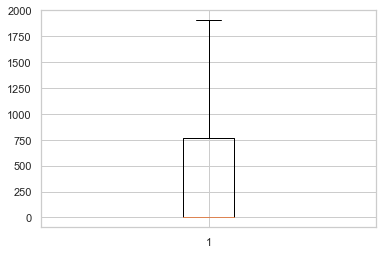

In [46]:
df_Business_Data.loc[df_Business_Data["MarkDown4"] > 1909.5, "MarkDown4"] = 1909.5
plt.boxplot(df_Business_Data['MarkDown4'])
#outlier removed

{'whiskers': [<matplotlib.lines.Line2D at 0x19a62ac6ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x19a62aee1c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19a62ac6760>],
 'medians': [<matplotlib.lines.Line2D at 0x19a62aee880>],
 'fliers': [<matplotlib.lines.Line2D at 0x19a62aeeb80>],
 'means': []}

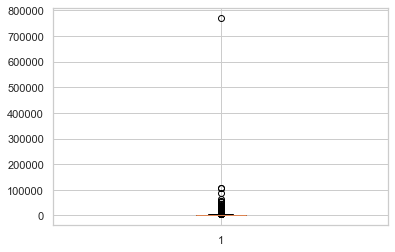

In [47]:
plt.boxplot(df_Business_Data['MarkDown5'])

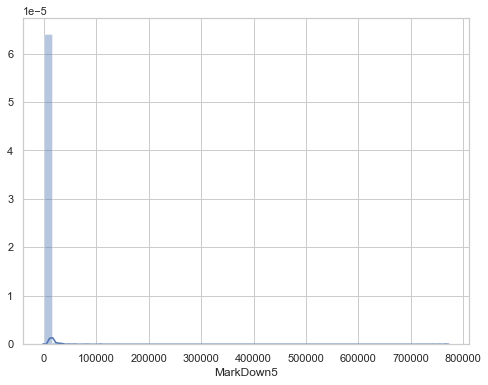

In [48]:
plt.figure(figsize=(8,6))
sns.distplot(df_Business_Data['MarkDown5'])

In [49]:
IQR = df_Business_Data['MarkDown5'].quantile(0.75) - df_Business_Data['MarkDown5'].quantile(0.25)
print('IQR:',IQR)

IQR: 2667.2625000000003


In [50]:
Upper_bound = df_Business_Data['MarkDown5'].quantile(0.75) + (1.5 * IQR)
lower_bound = df_Business_Data['MarkDown5'].quantile(0.25) - (1.5 * IQR)

print(Upper_bound)
print(lower_bound)

6668.15625
-4000.89375


{'whiskers': [<matplotlib.lines.Line2D at 0x19a62c2e280>,
 'caps': [<matplotlib.lines.Line2D at 0x19a62c2e940>,
 'boxes': [<matplotlib.lines.Line2D at 0x19a62c08ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x19a62c38040>],
 'fliers': [<matplotlib.lines.Line2D at 0x19a62c38340>],
 'means': []}

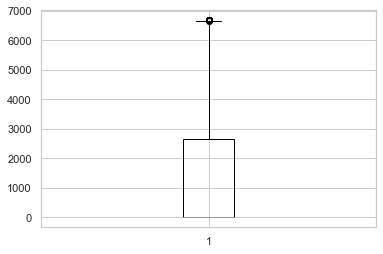

In [51]:
df_Business_Data.loc[df_Business_Data["MarkDown5"] > 6700.7, "MarkDown5"] = 6700.7
plt.boxplot(df_Business_Data['MarkDown5'])
#outlier removed

##### Now lets look Sales_History csv file

In [52]:
df_Sales_History = pd.read_csv('Sales_History.csv')

In [53]:
df_Sales_History.head()

,Store,Department,Date,Total_Sales,Holiday
0,1,1,4/30/2017,24924.50,False
1,1,1,11/30/2017,46039.49,True
2,1,1,2/17/2017,41595.55,False
3,1,1,2/24/2017,19403.54,False
4,1,1,5/1/2017,21827.90,False


In [54]:
df_Sales_History.shape

(421570, 5)

In [55]:
df_Sales_History.columns

Index(['Store', 'Department', 'Date', 'Total_Sales', 'Holiday'], dtype='object')

In [56]:
# Now we will check the descriptive statistics of Sales History
df_Sales_History.describe()

,Store,Department,Total_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [57]:
# no missing values found in Sales History
df_Sales_History.isnull().sum()

Store          0
Department     0
Date           0
Total_Sales    0
Holiday        0
dtype: int64

In [58]:
# Checking the number of rows having weekly sales 0 and below
df_Sales_History[df_Sales_History['Total_Sales']<=0]

,Store,Department,Date,Total_Sales,Holiday
846,1,6,10/7/2019,-139.65,False
2384,1,18,4/4/2019,-1.27,False
6048,1,47,2/17/2017,-863.00,False
6049,1,47,12/1/2017,-698.00,False
6051,1,47,8/8/2017,-58.00,False
...,...,...,...,...,...
419597,45,80,11/30/2017,-0.43,True
419598,45,80,2/17/2017,-0.27,False
419603,45,80,4/14/2017,-1.61,False
419614,45,80,2/5/2017,-0.27,False


In [59]:
# Droping sales value less than or equal to zero 
df_Sales_History.drop(df_Sales_History.index[df_Sales_History['Total_Sales'] <=0], inplace = True)

In [60]:
#Now we will group by sales by date and store 
df_Sales_History = df_Sales_History.groupby(['Store','Date']).agg({'Total_Sales': 'sum'})

In [61]:
# We will reset the index
df_Sales_History.reset_index(inplace=True)
df_Sales_History.head()

,Store,Date,Total_Sales
0,1,1/11/2019,1459601.17
1,1,1/12/2018,1391013.96
2,1,1/18/2019,1394393.84
3,1,1/19/2018,1327455.42
4,1,1/2/2018,1495064.75


In [62]:
# Now looking again the shape
df_Sales_History.shape

(6435, 3)

##### Now lets look Store_Details csv file

In [63]:
df_Store_Details = pd.read_csv('Store_Details.csv', encoding= 'unicode_escape') # to avoid error, encoding is used

In [64]:
df_Store_Details.head()

,Store,Type,Address,Area_Code,Location,Size
0,1,E-Commerce Fulfillment,"1893 W Malvern Ave, Fullerton, California",92835,Applegate Ranch Shopping Cente,151315
1,2,E-Commerce Fulfillment,"1000 Commerce Ave, Atwater, California",95301,Bayfair Cente,202307
2,3,Food,"15555 East 14th Street, San Leandro, California",94578,Capitola Mal,37392
3,4,E-Commerce Fulfillment,"1855 41st Avenue, Capitola, California",95010,Chino Spectrum Marketplace & Towne Cente,205863
4,5,Food,"3800-4046 Grand Ave.& 3801-4097 Grand Ave., Ch...",91710,Eagle Rock Plaz,34875


In [65]:
df_Store_Details.shape

(45, 6)

In [66]:
df_Store_Details.columns

Index(['Store', 'Type', 'Address', 'Area_Code', 'Location', 'Size'], dtype='object')

In [67]:
# Now we will check the descriptive statistics of Store Details
df_Store_Details.describe()

,Store,Area_Code,Size
count,45.000000,45.000000,45.000000
mean,23.000000,93094.511111,130287.600000
std,13.133926,1692.202769,63825.271991
min,1.000000,90041.000000,34875.000000
25%,12.000000,91942.000000,70713.000000
50%,23.000000,92832.000000,126512.000000
75%,34.000000,94578.000000,202307.000000
max,45.000000,95834.000000,219622.000000


In [68]:
# no missing values found in Store Details 
df_Store_Details.isnull().sum()

Store        0
Type         0
Address      0
Area_Code    0
Location     0
Size         0
dtype: int64

#### Merging the 3 files

In [69]:
df = pd.merge(df_Business_Data,df_Sales_History,how='inner',on=['Date','Store'])
df = pd.merge(df,df_Store_Details,how='inner',on='Store')

#### Final Dataset after merging the files

In [70]:
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate,Holiday,Total_Sales,Type,Address,Area_Code,Location,Size
0,1,4/30/2017,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1643690.90,E-Commerce Fulfillment,"1893 W Malvern Ave, Fullerton, California",92835,Applegate Ranch Shopping Cente,151315
1,1,11/30/2017,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,1641957.44,E-Commerce Fulfillment,"1893 W Malvern Ave, Fullerton, California",92835,Applegate Ranch Shopping Cente,151315
2,1,2/17/2017,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,1612831.17,E-Commerce Fulfillment,"1893 W Malvern Ave, Fullerton, California",92835,Applegate Ranch Shopping Cente,151315
3,1,2/24/2017,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,1409727.59,E-Commerce Fulfillment,"1893 W Malvern Ave, Fullerton, California",92835,Applegate Ranch Shopping Cente,151315
4,1,5/1/2017,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,1554806.68,E-Commerce Fulfillment,"1893 W Malvern Ave, Fullerton, California",92835,Applegate Ranch Shopping Cente,151315


In [71]:
df.shape

(6412, 18)

In [72]:
# We will remove the garbage columns which are irrelevant for the model analysis
df.drop(['Store','Address', 'Area_Code', 'Location'], axis = 1, inplace = True)
df.head()

,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate,Holiday,Total_Sales,Type,Size
0,4/30/2017,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1643690.90,E-Commerce Fulfillment,151315
1,11/30/2017,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,1641957.44,E-Commerce Fulfillment,151315
2,2/17/2017,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,1612831.17,E-Commerce Fulfillment,151315
3,2/24/2017,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,1409727.59,E-Commerce Fulfillment,151315
4,5/1/2017,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,1554806.68,E-Commerce Fulfillment,151315


In [73]:
# Now we extract some Time related features from Date feature of Sales_History.csv file
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Week'] = pd.to_datetime(df['Date']).dt.week
df['DayOfTheMonth'] = pd.to_datetime(df['Date']).dt.day

In [74]:
df.drop(['Date'],inplace=True,axis=1)

In [75]:
df.head()

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate,Holiday,Total_Sales,Type,Size,Year,Month,Week,DayOfTheMonth
0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1643690.90,E-Commerce Fulfillment,151315,2017,4,17,30
1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,1641957.44,E-Commerce Fulfillment,151315,2017,11,48,30
2,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,1612831.17,E-Commerce Fulfillment,151315,2017,2,7,17
3,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,1409727.59,E-Commerce Fulfillment,151315,2017,2,8,24
4,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,1554806.68,E-Commerce Fulfillment,151315,2017,5,18,1


In [76]:
df.shape

(6412, 17)

In [77]:
df.columns

Index(['Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment_Rate', 'Holiday',
       'Total_Sales', 'Type', 'Size', 'Year', 'Month', 'Week',
       'DayOfTheMonth'],
      dtype='object')

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6412 entries, 0 to 6411
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        6412 non-null   float64
 1   Fuel_Price         6412 non-null   float64
 2   MarkDown1          6412 non-null   float64
 3   MarkDown2          6412 non-null   float64
 4   MarkDown3          6412 non-null   float64
 5   MarkDown4          6412 non-null   float64
 6   MarkDown5          6412 non-null   float64
 7   CPI                6412 non-null   float64
 8   Unemployment_Rate  6412 non-null   float64
 9   Holiday            6412 non-null   bool   
 10  Total_Sales        6412 non-null   float64
 11  Type               6412 non-null   object 
 12  Size               6412 non-null   int64  
 13  Year               6412 non-null   int64  
 14  Month              6412 non-null   int64  
 15  Week               6412 non-null   int64  
 16  DayOfTheMonth      6412 

In [79]:
# Now we will check the descriptive statistics of our numerical features
df.describe()

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate,Total_Sales,Size,Year,Month,Week,DayOfTheMonth
count,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6.412000e+03,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000
mean,60.629930,3.357124,1893.765521,37.771103,9.401516,364.064981,1243.192046,171.564528,7.878209,1.046548e+06,130214.259669,2017.961478,6.433562,25.998908,15.180443
std,18.448674,0.458915,3505.218914,82.178192,19.730478,683.048214,2083.334956,39.352860,1.452309,5.644076e+05,63131.749856,0.796135,3.317370,14.523283,8.840624
min,5.000000,2.472000,0.000000,0.000000,0.000000,0.000000,0.000000,126.064000,5.000000,2.099863e+05,34875.000000,2017.000000,1.000000,1.000000,1.000000
25%,47.350000,2.931000,0.000000,0.000000,0.000000,0.000000,0.000000,131.735000,6.891000,5.528156e+05,70713.000000,2017.000000,4.000000,14.000000,7.000000
50%,62.630000,3.443000,0.000000,0.000000,0.000000,0.000000,0.000000,182.616521,7.874000,9.602671e+05,126512.000000,2018.000000,6.000000,26.000000,15.000000
75%,74.920000,3.734000,2229.840000,0.157500,3.642500,291.490000,1940.907500,212.738649,8.622000,1.419399e+06,202307.000000,2019.000000,9.000000,38.000000,23.000000
max,100.140000,4.468000,11541.800000,244.300000,60.500000,1909.500000,6700.700000,227.232807,11.000000,3.818686e+06,219622.000000,2019.000000,12.000000,52.000000,31.000000


In [80]:
# Descriptive statistics for both numerical and categorical variables
df.describe(include="all")

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate,Holiday,Total_Sales,Type,Size,Year,Month,Week,DayOfTheMonth
count,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412,6.412000e+03,6412,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,3,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,E-Commerce Fulfillment,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5966,NaN,3133,NaN,NaN,NaN,NaN,NaN
mean,60.629930,3.357124,1893.765521,37.771103,9.401516,364.064981,1243.192046,171.564528,7.878209,NaN,1.046548e+06,NaN,130214.259669,2017.961478,6.433562,25.998908,15.180443
std,18.448674,0.458915,3505.218914,82.178192,19.730478,683.048214,2083.334956,39.352860,1.452309,NaN,5.644076e+05,NaN,63131.749856,0.796135,3.317370,14.523283,8.840624
min,5.000000,2.472000,0.000000,0.000000,0.000000,0.000000,0.000000,126.064000,5.000000,NaN,2.099863e+05,NaN,34875.000000,2017.000000,1.000000,1.000000,1.000000
25%,47.350000,2.931000,0.000000,0.000000,0.000000,0.000000,0.000000,131.735000,6.891000,NaN,5.528156e+05,NaN,70713.000000,2017.000000,4.000000,14.000000,7.000000
50%,62.630000,3.443000,0.000000,0.000000,0.000000,0.000000,0.000000,182.616521,7.874000,NaN,9.602671e+05,NaN,126512.000000,2018.000000,6.000000,26.000000,15.000000
75%,74.920000,3.734000,2229.840000,0.157500,3.642500,291.490000,1940.907500,212.738649,8.622000,NaN,1.419399e+06,NaN,202307.000000,2019.000000,9.000000,38.000000,23.000000


In [81]:
# Descriptive statistics for categorical variables
df.describe(include="O")

,Type
count,6412
unique,3
top,E-Commerce Fulfillment
freq,3133


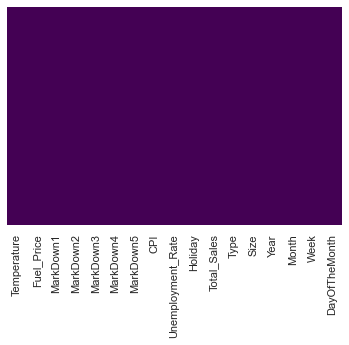

In [82]:
#checking for missing values in the final dataset
df.isnull().sum()

# to see missing value using visualisation
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Exploratory Data Analysis

### Uni-Variate Analysis

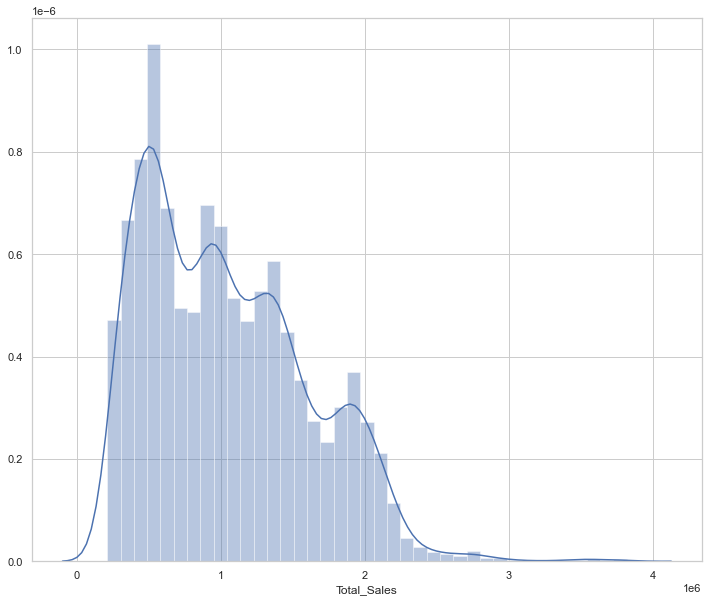

In [83]:
# Density distribution for target variable
plt.figure(figsize=(12,10))
sns.distplot(df['Total_Sales'])
plt.show()

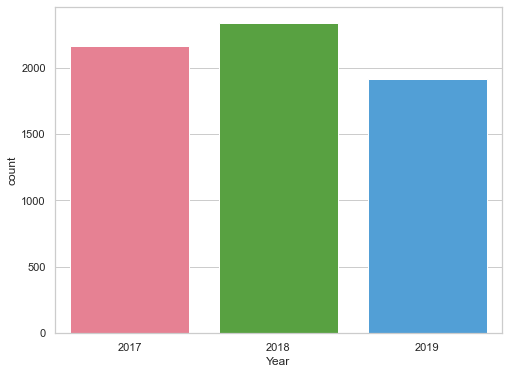

In [84]:
plt.figure(figsize=(8,6))
sns.countplot(x ='Year', data = df, palette ='husl')
plt.show()

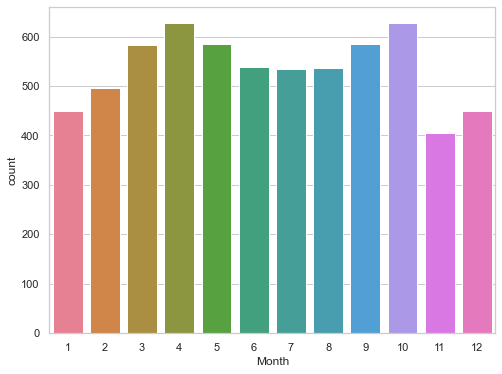

In [85]:
plt.figure(figsize=(8,6))
sns.countplot(x ='Month', data = df, palette ='husl')
plt.show()

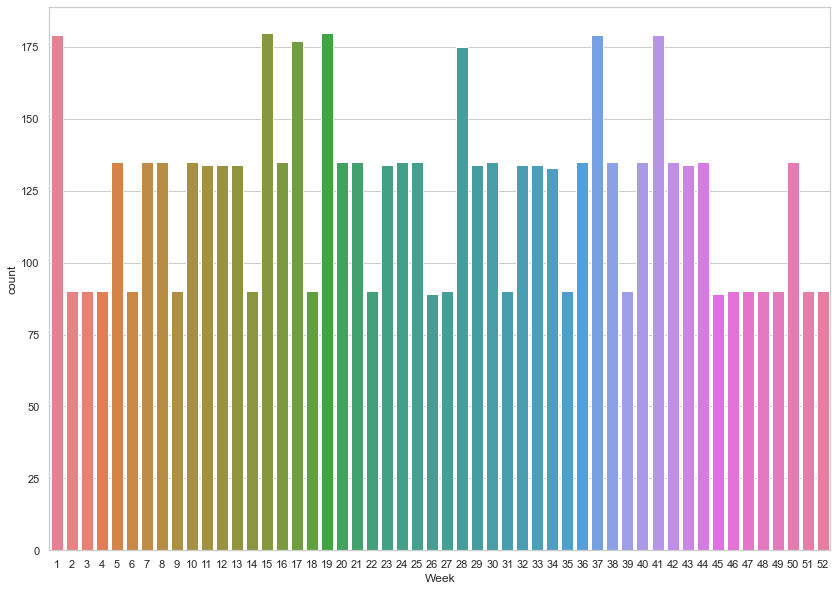

In [86]:
plt.figure(figsize=(14,10))
sns.countplot(x ='Week', data = df, palette ='husl')
plt.show()

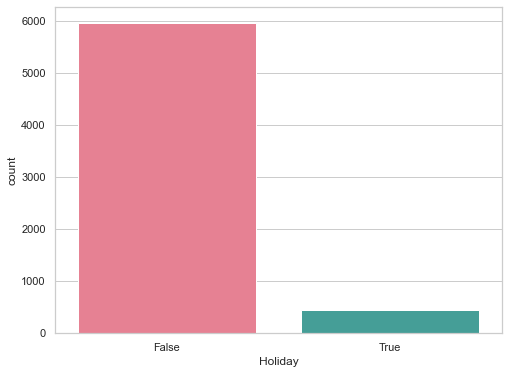

In [87]:
plt.figure(figsize=(8,6))
sns.countplot(x ='Holiday', data = df, palette ='husl')
plt.show()

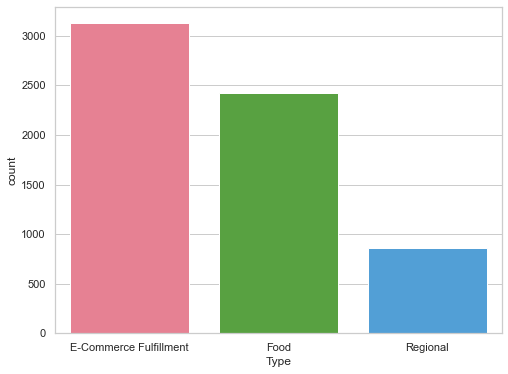

In [88]:
plt.figure(figsize=(8,6))
sns.countplot(x ='Type', data = df, palette ='husl')
plt.show()

#### E-Commerce Fullfillment stores are more popular than the Food Type and Regional types

### Bivariate Analysis
* Boxplots
* Violon plots

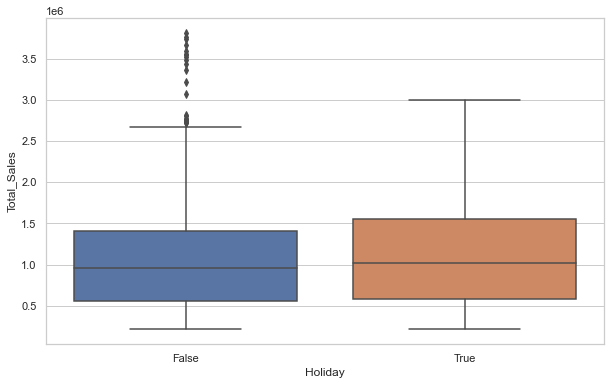

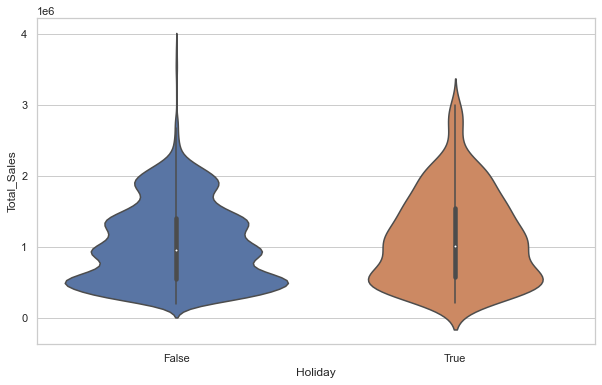

In [89]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'Holiday', y = 'Total_Sales', data = df)
plt.show()

plt.figure(figsize=(10,6))
sns.violinplot(x = "Holiday", y = 'Total_Sales', data = df)
plt.show()

#### Over here we can see that there is more sales during the Holidays and we can give more discounts to the customers on the holidays so it can increase the revenue.

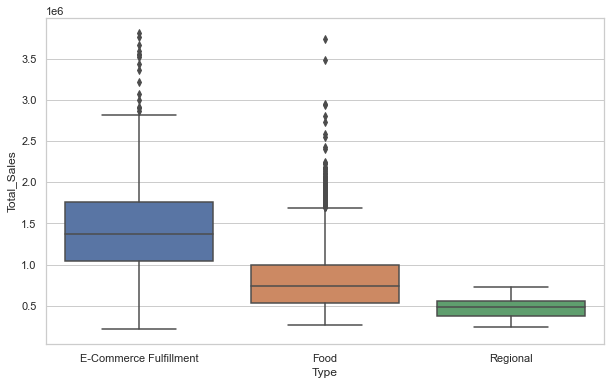

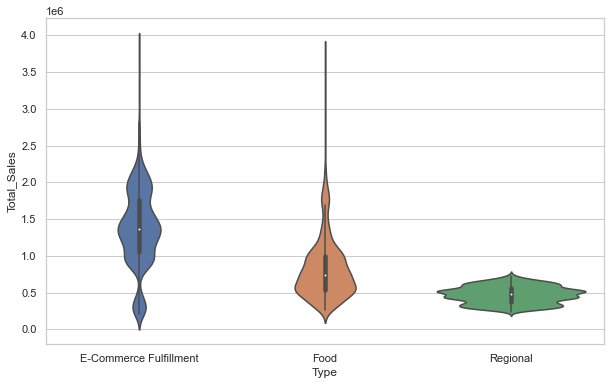

In [90]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'Type', y = 'Total_Sales', data = df)
plt.show()


plt.figure(figsize=(10,6))
sns.violinplot(x = 'Type', y = 'Total_Sales', data = df)
plt.show()

#### Over here we can see that the customers are more interested in E-Commerce Fulfillment store type instead of other store types like Food type or Regional type. We can give more discounts and offers on the product who use E-commerce store type.

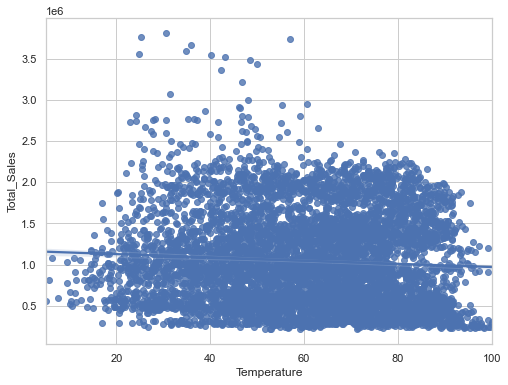

In [91]:
# Scatterplot for Temperature with total_sales
plt.figure(figsize = (8,6))
sns.regplot(x = 'Temperature' , y = 'Total_Sales', data = df)
plt.show()

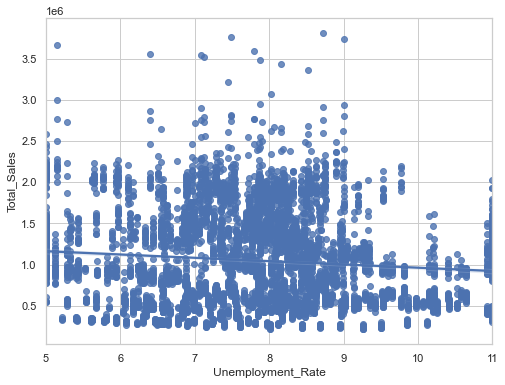

In [92]:
# Scatterplot for Unemployment_Rate with total_sales
plt.figure(figsize = (8,6))
sns.regplot(x = 'Unemployment_Rate' , y = 'Total_Sales', data = df)
plt.show()

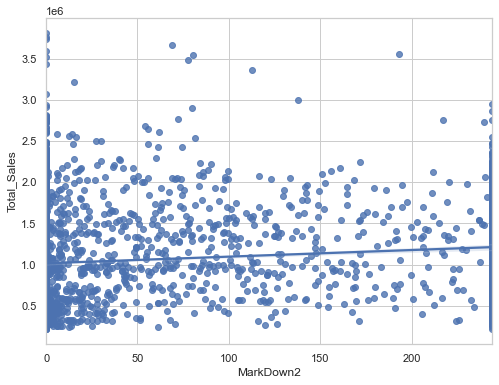

In [93]:
# Scatterplot for markdown2 with total_sales
plt.figure(figsize = (8,6))
sns.regplot(x = 'MarkDown2' , y = 'Total_Sales', data = df)
plt.show()

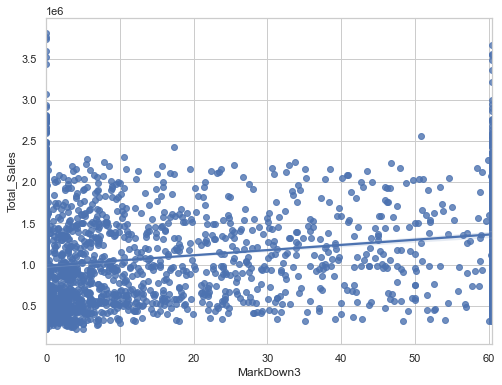

In [94]:
# Scatterplot for markdown3 with total_sales
plt.figure(figsize = (8,6))
sns.regplot(x = 'MarkDown3' , y = 'Total_Sales', data = df)
plt.show()

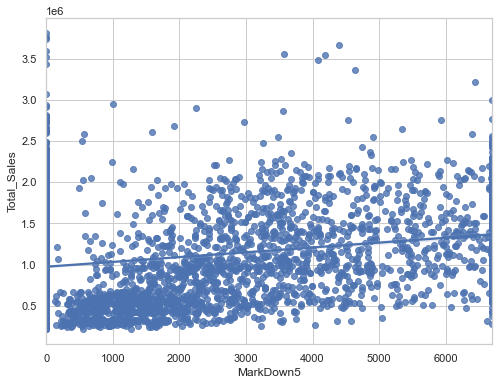

In [95]:
# Scatterplot for markdown5 with total_sales
plt.figure(figsize = (8,6))
sns.regplot(x = 'MarkDown5' , y = 'Total_Sales', data = df)
plt.show()

### Multivariate Analysis
* Pairplots

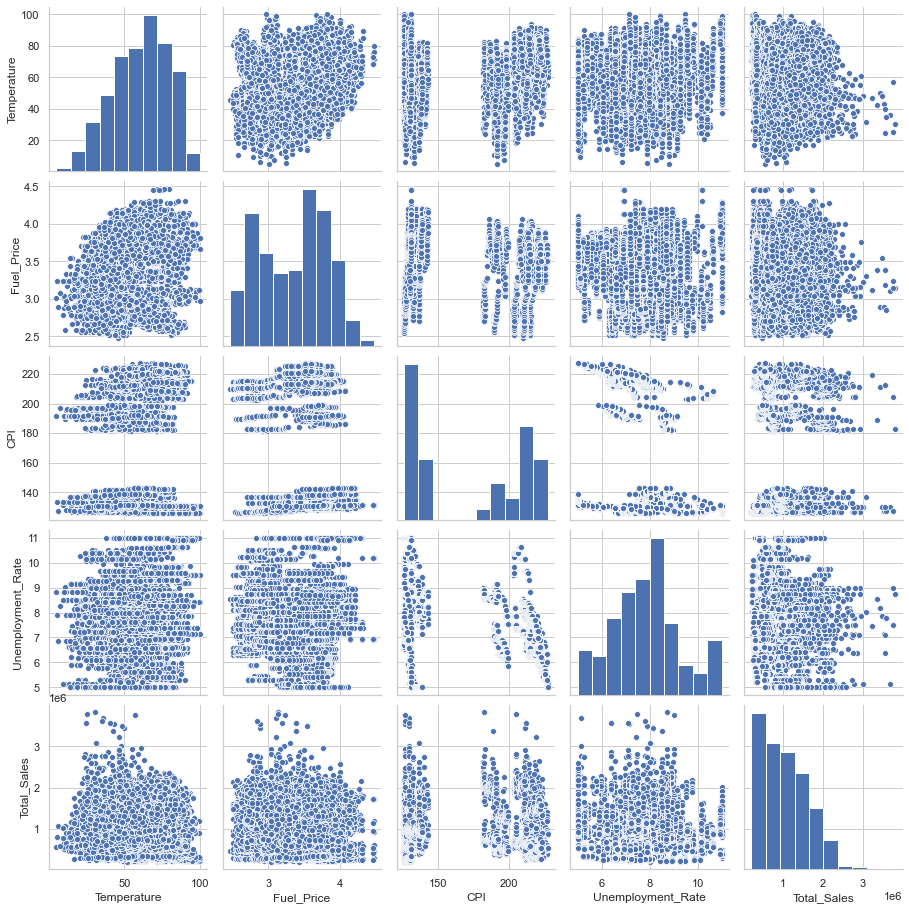

In [96]:
# Pair-plots for numerical variables
sns.set_style('whitegrid')
sns.pairplot(df[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment_Rate','Total_Sales']])
plt.show()

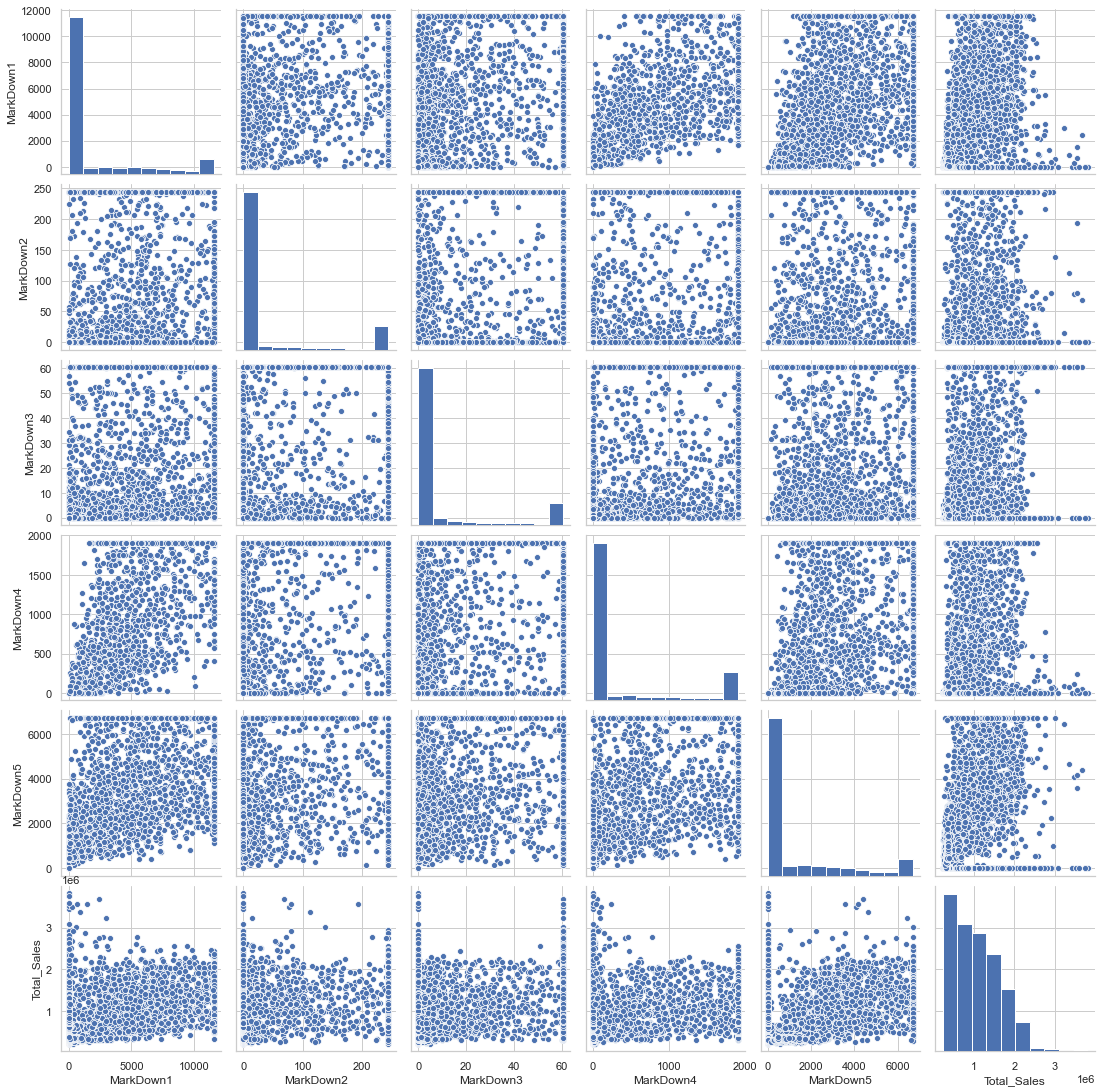

In [97]:
# Pair-plots for Markdown columns
sns.set_style('whitegrid')
sns.pairplot(df[['MarkDown1', 'MarkDown2','MarkDown3', 'MarkDown4', 'MarkDown5','Total_Sales']])
plt.show()

### Feature Engineering

In [98]:
# Converting categorical data into one-hot-encoding
X_Dummies = pd.get_dummies(df["Type"])
X_Dummies.head()

,E-Commerce Fulfillment,Food,Regional
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [99]:
df = pd.concat([df,X_Dummies],axis=1)

In [100]:
df.head()

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate,Holiday,Total_Sales,Type,Size,Year,Month,Week,DayOfTheMonth,E-Commerce Fulfillment,Food,Regional
0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1643690.90,E-Commerce Fulfillment,151315,2017,4,17,30,1,0,0
1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,1641957.44,E-Commerce Fulfillment,151315,2017,11,48,30,1,0,0
2,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,1612831.17,E-Commerce Fulfillment,151315,2017,2,7,17,1,0,0
3,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,1409727.59,E-Commerce Fulfillment,151315,2017,2,8,24,1,0,0
4,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,1554806.68,E-Commerce Fulfillment,151315,2017,5,18,1,1,0,0


In [101]:
df = df.drop(["Type"],axis=1)

In [102]:
df.head()

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate,Holiday,Total_Sales,Size,Year,Month,Week,DayOfTheMonth,E-Commerce Fulfillment,Food,Regional
0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1643690.90,151315,2017,4,17,30,1,0,0
1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,1641957.44,151315,2017,11,48,30,1,0,0
2,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,1612831.17,151315,2017,2,7,17,1,0,0
3,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,1409727.59,151315,2017,2,8,24,1,0,0
4,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,1554806.68,151315,2017,5,18,1,1,0,0


In [103]:
# Replacing the Column Holiday with False =NO and True=YES
df['Holiday'] = np.where(df['Holiday'] == False,"NO","YES")

In [104]:
# One hot encoding for Holiday column 
df['Holiday'].replace({"YES":1,"NO":0},inplace=True)
df.head()

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate,Holiday,Total_Sales,Size,Year,Month,Week,DayOfTheMonth,E-Commerce Fulfillment,Food,Regional
0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,1643690.90,151315,2017,4,17,30,1,0,0
1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,1,1641957.44,151315,2017,11,48,30,1,0,0
2,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,1612831.17,151315,2017,2,7,17,1,0,0
3,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,1409727.59,151315,2017,2,8,24,1,0,0
4,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,1554806.68,151315,2017,5,18,1,1,0,0


In [105]:
df.columns

Index(['Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment_Rate', 'Holiday',
       'Total_Sales', 'Size', 'Year', 'Month', 'Week', 'DayOfTheMonth',
       'E-Commerce Fulfillment', 'Food', 'Regional'],
      dtype='object')

In [106]:
df.rename(columns={'E-Commerce Fulfillment': 'ECommerceFulfillment'}, inplace=True)

In [107]:
# Continuous variables and categorical variables
Continuous_variables = ['Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
                        'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment_Rate','Total_Sales', 'Size']

categorical_variables = ['Holiday', 'Year', 'Month', 'Week', 'DayOfTheMonth','ECommerceFulfillment', 'Food', 'Regional']

### Hypothesis Testing

### ANOVA Test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Predictor variable is same for all the groups in the categorical Target variable) ANOVA Test result: Probability of H0 being true

In [108]:
# ANOVA test
for col in categorical_variables:
    model = ols('Total_Sales' + '~' + col, data = df).fit() # Oridnary least square method
    result_anova = sm.stats.anova_lm(model) # ANOVA Test
    print("Anova test results for", col)
    print(result_anova)
    print("=======================================================================\n")

Anova test results for Holiday
              df        sum_sq       mean_sq         F    PR(>F)
Holiday      1.0  2.849504e+12  2.849504e+12  8.956169  0.002776
Residual  6410.0  2.039413e+15  3.181611e+11       NaN       NaN

Anova test results for Year
              df        sum_sq       mean_sq         F    PR(>F)
Year         1.0  7.938491e+11  7.938491e+11  2.492604  0.114432
Residual  6410.0  2.041468e+15  3.184818e+11       NaN       NaN

Anova test results for Month
              df        sum_sq       mean_sq          F        PR(>F)
Month        1.0  9.843259e+12  9.843259e+12  31.044433  2.624417e-08
Residual  6410.0  2.032419e+15  3.170700e+11        NaN           NaN

Anova test results for Week
              df        sum_sq       mean_sq          F        PR(>F)
Week         1.0  9.313870e+12  9.313870e+12  29.367156  6.206599e-08
Residual  6410.0  2.032948e+15  3.171526e+11        NaN           NaN

Anova test results for DayOfTheMonth
                   df        sum_

In [115]:
# we wil drop the 'Year' and 'DayOfTheMonth' variables as it has high p-values
df.drop(['Year','DayOfTheMonth'], axis = 1, inplace=True)

### Correlation Test

In [116]:
# Correlation Matrix
df.iloc[:,[0,1,2,3,4,5,6,7,8,10,11]].corr()

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate,Total_Sales,Size
Temperature,1.000000,0.144103,-0.021950,-0.183108,-0.118627,-0.001933,-0.042711,0.176953,0.085203,-0.064310,-0.093145
Fuel_Price,0.144103,1.000000,0.391332,0.236014,0.256938,0.373012,0.372029,-0.170651,-0.049576,0.008071,0.007211
MarkDown1,-0.021950,0.391332,1.000000,0.595515,0.619374,0.899256,0.795660,0.022458,-0.154625,0.214094,0.233752
MarkDown2,-0.183108,0.236014,0.595515,1.000000,0.447615,0.570511,0.598419,0.027657,-0.135342,0.116865,0.141757
MarkDown3,-0.118627,0.256938,0.619374,0.447615,1.000000,0.580942,0.656058,0.010877,-0.143849,0.220148,0.174819
MarkDown4,-0.001933,0.373012,0.899256,0.570511,0.580942,1.000000,0.788525,0.022803,-0.169876,0.207472,0.224649
MarkDown5,-0.042711,0.372029,0.795660,0.598419,0.656058,0.788525,1.000000,0.061791,-0.197949,0.216747,0.216364
CPI,0.176953,-0.170651,0.022458,0.027657,0.010877,0.022803,0.061791,1.000000,-0.292097,-0.072025,-0.009554
Unemployment_Rate,0.085203,-0.049576,-0.154625,-0.135342,-0.143849,-0.169876,-0.197949,-0.292097,1.000000,-0.103296,-0.094003
Total_Sales,-0.064310,0.008071,0.214094,0.116865,0.220148,0.207472,0.216747,-0.072025,-0.103296,1.000000,0.810718


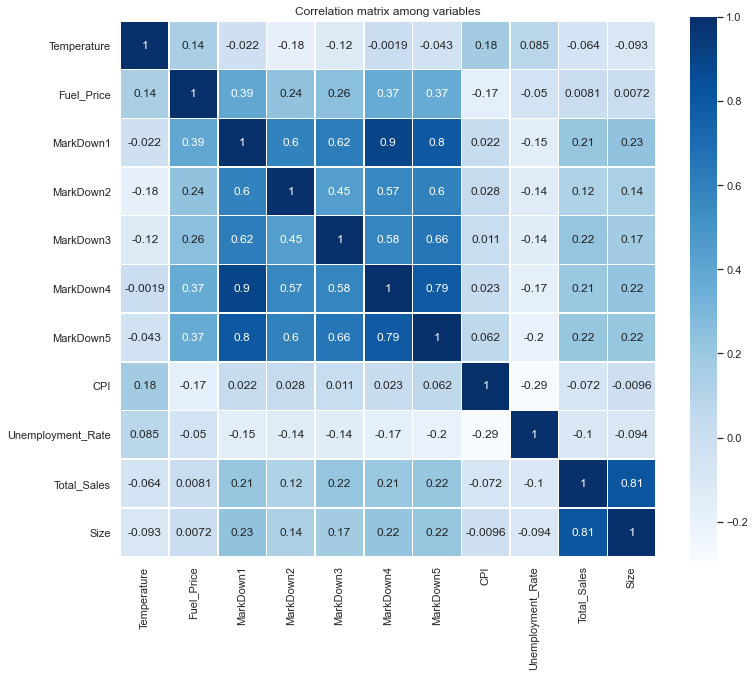

In [117]:
# Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.iloc[:,[0,1,2,3,4,5,6,7,8,10,11]].corr(), square=True, annot=True, linewidths=.5, cmap="Blues")
plt.title("Correlation matrix among variables")
plt.show()

### Creating the Independendent and Dependent Data Sets

In [118]:
X = df.drop(["Total_Sales"],axis = 1)

In [119]:
y = df["Total_Sales"]

### Model Building

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [121]:
X_train.columns

Index(['Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment_Rate', 'Holiday', 'Size',
       'Month', 'Week', 'ECommerceFulfillment', 'Food', 'Regional'],
      dtype='object')

In [122]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4488, 16)
(1924, 16)
(4488,)
(1924,)


### Feature Scaling : Standarisation of data

In [123]:
from sklearn.preprocessing import StandardScaler

In [124]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 

In [125]:
X_test_scaled = scaler.transform(X_test)

In [126]:
# Fitting Multiple Linear Regression to the Training set

In [127]:
from sklearn.linear_model import LinearRegression

In [128]:
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

### Prediction of the Model

In [129]:
y_pred = regressor.predict(X_test_scaled)

In [130]:
y_pred

array([ 807331.76314771,  955950.91888724, 1611008.638067  , ...,
        882829.28830945, 1587405.09081915, 1024430.23389455])

In [131]:
# r-square score on train data
regressor.score(X_train_scaled,y_train)

0.6849664953418033

In [132]:
# r-square score on test data
regressor.score(X_test_scaled,y_test)

0.6745110148406147

In [133]:
#Mean Absolute Error
print('MAE of Linear Regression model:', metrics.mean_absolute_error(y_test, y_pred))
print("=======================================================================\n")
#Mean Squared Error
print('MSE of Linear Regression model:', metrics.mean_squared_error(y_test, y_pred))
print("=======================================================================\n")
#Root Mean Squared Error
print('RMSE of Linear Regression model:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("=======================================================================\n")
# regression intercept
print('Intercept of Linear Regression model:' ,regressor.intercept_)
print("=======================================================================\n")
print("Coefficients of Linear Reg model: ",regressor.coef_)
print("=======================================================================\n")

MAE of Linear Regression model: 240086.96714344094

MSE of Linear Regression model: 106909093283.16592

RMSE of Linear Regression model: 326969.5601782617

Intercept of Linear Regression model: 1043901.0102829767

Coefficients of Linear Reg model:  [  22237.19942567  -22862.89469513  -18398.31666145  -10649.68231217
   47894.5961914     4714.38451276   15590.7773183   -47063.68005575
  -32213.61280494   11669.82791592  492786.36462553  187680.06605961
 -164484.6762281   -27591.57778003   -2000.81689932   43189.97496038]



### Plotting the Results

Text(0.5, 1.0, 'Actual vs Predicted')

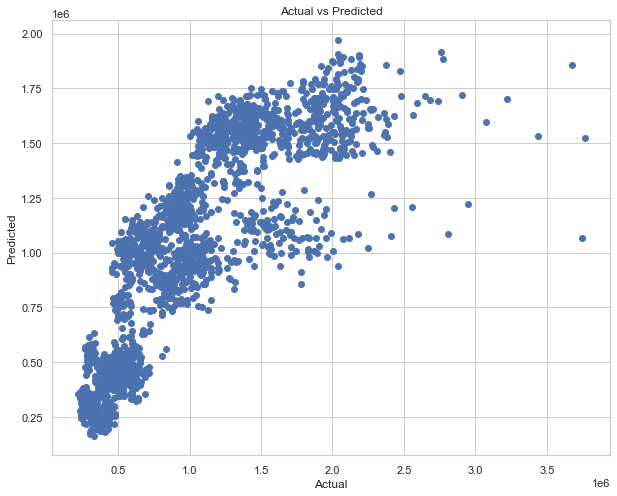

In [134]:
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')